## Part II ‚Äì Using the perceptron:

In [1]:
# load packages

using Flux, Images, MLDatasets, Plots

using Flux: crossentropy, onecold, onehotbatch, params, train!

using Random, Statistics


In [2]:
# set random seed

Random.seed!(1)


TaskLocalRNG()

In [3]:
# load data

# Latex: let's use \_rho for Raw Data i.e X_train·µ®
# X contains the images and y contains the labels

X_train·µ®, y_train·µ® = MLDatasets.MNIST(:train)[:]; @show typeof(X_train·µ®), size(X_train·µ®)

X_test·µ®, y_test·µ® = MLDatasets.MNIST(:test)[:]; @show typeof(X_test·µ®), size(X_test·µ®);


(typeof(X_train·µ®), size(X_train·µ®)) = (Array{Float32, 3}, (28, 28, 60000))
(typeof(X_test·µ®), size(X_test·µ®)) = (Array{Float32, 3}, (28, 28, 10000))


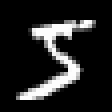

In [4]:
# view training input

index = 1; img = X_train·µ®[:, :, index]

# use the ' transpose sign to invert the image

colorview(Gray, img')


In [5]:
# view training label

y_train·µ®[index]


5

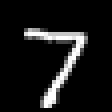

In [6]:
# view testing input

colorview(Gray, X_test·µ®[:, :, index]')


In [7]:
# view testing label

y_test·µ®[index]


7

In [8]:
# flatten input data

X_train = Flux.flatten(X_train·µ®); @show typeof(X_train), size(X_train)

X_test = Flux.flatten(X_test·µ®); @show typeof(X_test), size(X_test);


(typeof(X_train), size(X_train)) = (Matrix{Float32}, (784, 60000))
(typeof(X_test), size(X_test)) = (Matrix{Float32}, (784, 10000))


&#x1F4CD; Note: Dimensions

> Hint: The digits dataset is a dataset of images. You need to convert them from a 2D array to a 1D one.

Flattening allow the data to strip down from an array of three dimensions `Array{Float32, 3}, (28, 28, 60000)` to a Matrix  `Matrix{Float32}, (784, 60000)`.
The 28x28 tensor array has been replaced to a 784 column vector where each column contains the floating point numbers associated with each image.


In [9]:
# one-hot encode labels

y_train = onehotbatch(y_train·µ®, 0:9)

y_test = onehotbatch(y_test·µ®, 0:9)


10√ó10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚Ä¶  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ
 ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ     ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ
 ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ     ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ
 ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ     ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ
 ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ     ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ
 ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚Ä¶  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ
 ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1  ‚ãÖ     ‚ãÖ  1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  1
 1  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ  ‚ãÖ     ‚ãÖ  ‚ãÖ  

&#x1F4CD; Note: one-hot encoding

As you can see with the above result,  the 1st label appearing in `y_test·µ®` previously viewed is a `seven` label. In the column vector, it appears at the 8th row; (marked by  a ${\color{Green}1}$) because, the column vector starts from 0 and ends at 9 (labels). The dots represent  zeroes ${\color{Salmon}0}$.


As a side note, Julia' indexing is 1-based, like Matlab. Python indexing is 0-based.

<img src=images/one-hot-label.png width='' height='' > </img>

In [10]:
# define model architecture

model = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 10),
    softmax
)

Chain(
  Dense(784 => 32, relu),               # 25_120 parameters
  Dense(32 => 10),                      # 330 parameters
  NNlib.softmax,
)                   # Total: 4 arrays, 25_450 parameters, 99.664 KiB.

In [11]:
# define loss function ùêø

ùêø(x, y) = crossentropy(model(x), y)


ùêø (generic function with 1 method)

In [15]:
# track parameters called Œ∏

Œ∏ = params(model);

In [16]:
# select optimizer

# Let's define the learning rate Œ∑ \eta
Œ∑ = Float32(0.01)

opt = ADAM(Œ∑)

Adam(0.009999999776482582, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [17]:
# train model

# Let's keep track of the loss history
loss_history = []

epochs = 500

for epoch in 1:epochs
    # train model
    train!(ùêø, Œ∏, [(X_train, y_train)], opt)
    # print report
    train_loss = ùêø(X_train, y_train)
    push!(loss_history, train_loss)
    println("Epoch = $epoch : Training Loss = $train_loss")
end

Epoch = 1 : Training Loss = 1.723311
Epoch = 2 : Training Loss = 1.291694
Epoch = 3 : Training Loss = 0.9837209
Epoch = 4 : Training Loss = 0.7877831
Epoch = 5 : Training Loss = 0.67078894
Epoch = 6 : Training Loss = 0.5911647
Epoch = 7 : Training Loss = 0.5364811
Epoch = 8 : Training Loss = 0.49772683
Epoch = 9 : Training Loss = 0.4683123
Epoch = 10 : Training Loss = 0.4448052
Epoch = 11 : Training Loss = 0.42594695
Epoch = 12 : Training Loss = 0.41077128
Epoch = 13 : Training Loss = 0.3963644
Epoch = 14 : Training Loss = 0.38463184
Epoch = 15 : Training Loss = 0.3747828
Epoch = 16 : Training Loss = 0.36559427
Epoch = 17 : Training Loss = 0.35712177
Epoch = 18 : Training Loss = 0.3490166
Epoch = 19 : Training Loss = 0.34206536
Epoch = 20 : Training Loss = 0.3351813
Epoch = 21 : Training Loss = 0.32819563
Epoch = 22 : Training Loss = 0.32181603
Epoch = 23 : Training Loss = 0.3158584
Epoch = 24 : Training Loss = 0.31042445
Epoch = 25 : Training Loss = 0.30507693
Epoch = 26 : Training Lo

In [18]:
# make predictions

# Let's call the predicted variable yÃÇ (Latex: \hat{y} or y\hat)

yÃÇ·µ® = model(X_test)

yÃÇ = onecold(yÃÇ·µ®) .- 1

y = y_test·µ®

mean(yÃÇ .== y)

0.9624

In [19]:
# display results

check = [yÃÇ[i] == y[i] for i in 1:length(y)]

index = collect(1:length(y))

check_display = [index yÃÇ y check]

10000√ó4 Matrix{Int64}:
     1  7  7  1
     2  2  2  1
     3  1  1  1
     4  0  0  1
     5  4  4  1
     6  1  1  1
     7  4  4  1
     8  9  9  1
     9  4  5  0
    10  9  9  1
    11  0  0  1
    12  6  6  1
    13  9  9  1
     ‚ãÆ        
  9989  5  5  1
  9990  6  6  1
  9991  7  7  1
  9992  8  8  1
  9993  9  9  1
  9994  8  0  0
  9995  1  1  1
  9996  2  2  1
  9997  3  3  1
  9998  4  4  1
  9999  5  5  1
 10000  6  6  1

(y[misclass_index], ≈∑[misclass_index]) = (5, 4)


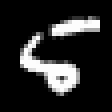

In [20]:
# view misclassifications

misclass_index = 9
img = X_test·µ®[:, :, misclass_index]

@show y[misclass_index], yÃÇ[misclass_index];

colorview(Gray, img')

In [21]:
# initialize plot

gr(size = (600, 600))

# plot learning curve

p_l_curve = plot(1:epochs, loss_history,
    xlabel = "Epochs",
    ylabel = "Loss",
    title = "Learning Curve",
    legend = false,
    color = :blue,
    linewidth = 2
)
# save plot
savefig(p_l_curve, "images/ann_learning_curve.svg");

<img src=images/ann_learning_curve.svg width='' height='' > </img>

# References

- [ ] [Is there a way to print loss from Flux.train?](https://stackoverflow.com/questions/73737260/is-there-a-way-to-print-loss-from-flux-train)
- [ ] [The Future of Machine Learning and why it looks a lot like Julia ü§ñ](https://towardsdatascience.com/the-future-of-machine-learning-and-why-it-looks-a-lot-like-julia-a0e26b51f6a6)